In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
df_employee = pd.read_csv('C:\\Users\\LABONI\\Documents\\OLYMPUS\\NPV\\NPV - Mini - Question-1\\emp_health.csv')
df_employee

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


# a. Reading some rows of dataset

In [8]:
df_employee.sample(5)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
856,i10868,48,female,33.110,0,daily,yes,east,40974.16490
949,i10961,25,male,29.700,3,party,yes,southwest,19933.45800
1193,i11205,48,female,36.575,0,no,no,west,8671.19125
977,i10989,26,male,29.150,1,daily,no,southeast,2902.90650
642,i10654,61,male,33.915,0,party,no,northeast,13143.86485


# b. Learn data types of all features

In [9]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


#  c. See the statistical properties of the data

In [10]:
df_employee.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [11]:
df_employee[(df_employee['age']>50) & (df_employee['smoke']=='yes')]['id'].count()

64

In [ ]:
# There are 64 employees above 50 age smoke

In [13]:
df_employee[(df_employee['age']>50) & (df_employee['smoke']=='yes')]['expenditure'].mean()

38820.22308234375

In [ ]:
# The average expenditure on health management of above 50 age employee is Rs. 38820.22308234375.

##  2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [16]:
alcoholic_females = df_employee[(df_employee['sex']=='female') & (df_employee['alcohol']!='daily')]['id'].count()
alcoholic_females

453

In [ ]:
# There are 453 female employees did not consume alcohol daily.

In [18]:
total_females = df_employee[(df_employee['sex'] == 'female')]['id'].count()
total_females

662

In [21]:
proportion = round((alcoholic_females/total_females)*100,2)
proportion

68.43

In [22]:
# 68.43% is the proportion with respect to total female employees.

## 3. Display zone wise average expenditure of employees on health

In [23]:
pd.pivot_table(df_employee,index=['zone'],values=['expenditure'],aggfunc=np.mean)

,expenditure
zone,
east,13774.679941
north,14102.583403
northeast,13694.721724
northwest,12151.702619
south,14715.689519
southeast,14452.949680
southwest,12717.083869
west,12182.998872


## 4. Employees of which zone did maximum expenditure on health

In [24]:
pd.pivot_table(df_employee,index=['zone'],values=['expenditure'],aggfunc=np.max)

,expenditure
zone,
east,58571.07448
north,48549.17835
northeast,46255.11250
northwest,55135.40209
south,47055.53210
southeast,63770.42801
southwest,52590.82939
west,60021.39897


In [ ]:
# Employees of southeast zone did maximum expenditure on health with 63770.42801

## 5. What is the minimum expenditure done by any employee in organization

In [25]:
df_employee['expenditure'].min()

1121.8739

In [ ]:
# The minimum expenditure done by an employee is 1121.8739

## 6. What is average expenditure of employees who have 2 or lesser dependents

In [26]:
df_employee[(df_employee['dependent']<=2)]['expenditure'].mean()

13040.970970948145

In [ ]:
# The average expenditure of employees who have 2 or lesser dependents is 13040.970970948145

## 7. How many employees are below age of 20 years. What is their average BMI

In [28]:
df_employee[(df_employee['age']<20)]['id'].count()

137

In [ ]:
# There are 137 employees are below age of 20 years.

In [29]:
df_employee[(df_employee['age']<20)]['bmi'].mean()

29.971496350364966

In [ ]:
# 29.97 is their average BMI

## 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [30]:
non_smoker = df_employee[(df_employee['sex']=='male') & (df_employee['smoke']=='no')]
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


## 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [34]:
non_alcoholic = pd.DataFrame(df_employee[(df_employee['sex']=='male') & (df_employee['alcohol']=='no')].reset_index())
non_alcoholic

,index,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
1,24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
2,28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
3,37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
4,38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...,...
142,1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
143,1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
144,1310,i11322,42,male,26.315,1,no,no,west,6940.90985
145,1320,i11332,31,male,31.065,3,no,no,west,5425.02335


## 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol

In [36]:
non_smoking_alcoholic = pd.DataFrame(df_employee[(df_employee['sex']=='male') & (df_employee['smoke']=='no') & (df_employee['alcohol']=='no')][['id','smoke','alcohol']].reset_index())
non_smoking_alcoholic

,index,id,smoke,alcohol
0,18,i10030,no,no
1,24,i10036,no,no
2,28,i10040,no,no
3,37,i10049,no,no
4,67,i10079,no,no
...,...,...,...,...
104,1261,i11273,no,no
105,1270,i11282,no,no
106,1310,i11322,no,no
107,1320,i11332,no,no


#  11.What is the count for each zone with respect to number of dependent

In [39]:
pd.pivot_table(df_employee,index=['zone'],values=['dependent'],aggfunc='count')

,dependent
zone,
east,262
north,70
northeast,74
northwest,145
south,84
southeast,198
southwest,251
west,254


## 12. Classify the employees into 3 categories.
## Category 1 : employees below 18.5 bmi - underweight
## Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
## Category 3 : bmi over 24.9 - overweight
## What is the average expenditure employee with of employees in each category.
## Display the bar chart for the same


In [5]:
df_employee['weight'] = pd.cut(df_employee['bmi'],bins=[0,18.5,24.9,100],labels=['underweight','fit','overweight'])
df_employee

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,weight
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400,overweight
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230,overweight
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200,overweight
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061,fit
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830,overweight
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080,overweight
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350,overweight
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500,overweight


In [6]:
ave = df_employee.groupby('weight')['expenditure'].mean()
ave

weight
underweight     8657.620652
fit            10404.900084
overweight     13936.616823
Name: expenditure, dtype: float64

In [24]:
px.bar(ave)

## 13. Draw line plot of expenditure against age and BMI

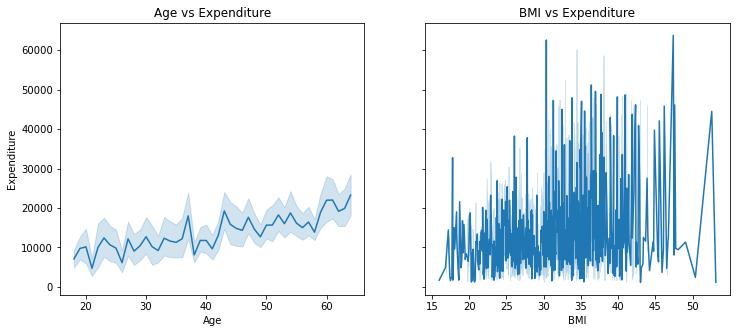

In [21]:
figure,a=plt.subplots(1,2,figsize=(12,5),sharey=True)

sns.lineplot(data=df_employee,ax=a[0],x='age',y='expenditure')
a[0].set_title('Age vs Expenditure')
a[0].set_xlabel('Age')
a[0].set_ylabel('Expenditure')

sns.lineplot(ax=a[1],x='bmi',y='expenditure',data=df_employee)
a[1].set_title('BMI vs Expenditure')
a[1].set_xlabel('BMI')
a[1].set_ylabel('Expenditure')

plt.show()

## 14. Draw a bar chart to show zone wise average expenditure

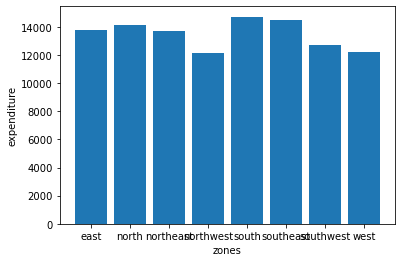

In [10]:
table = pd.pivot_table(df_employee,index='zone',values='expenditure',aggfunc=np.mean)
table

plt.bar(table.index,table['expenditure'])
plt.xlabel('zones') 
plt.ylabel('expenditure')

plt.show()

## 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

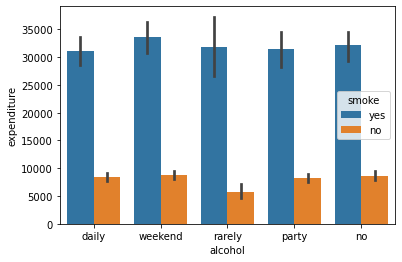

In [12]:
sns.barplot(data=df_employee,x='alcohol',y='expenditure',hue='smoke')

plt.show()

## 16. Draw pie chart for alcohol consumption habits

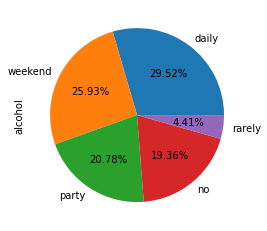

In [14]:
df_employee['alcohol'].value_counts().plot(kind='pie',autopct='%0.2f%%')

plt.show()

## 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

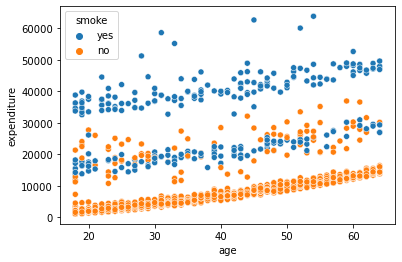

In [15]:
sns.scatterplot(data=df_employee,x='age',y='expenditure',hue='smoke')

plt.show()

## 18. distribution plot of expenditure Draw 

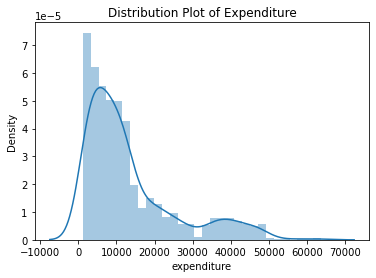

In [17]:
sns.distplot(df_employee['expenditure'])
plt.title('Distribution Plot of Expenditure')
plt.show()

## 19. Display the pairplot

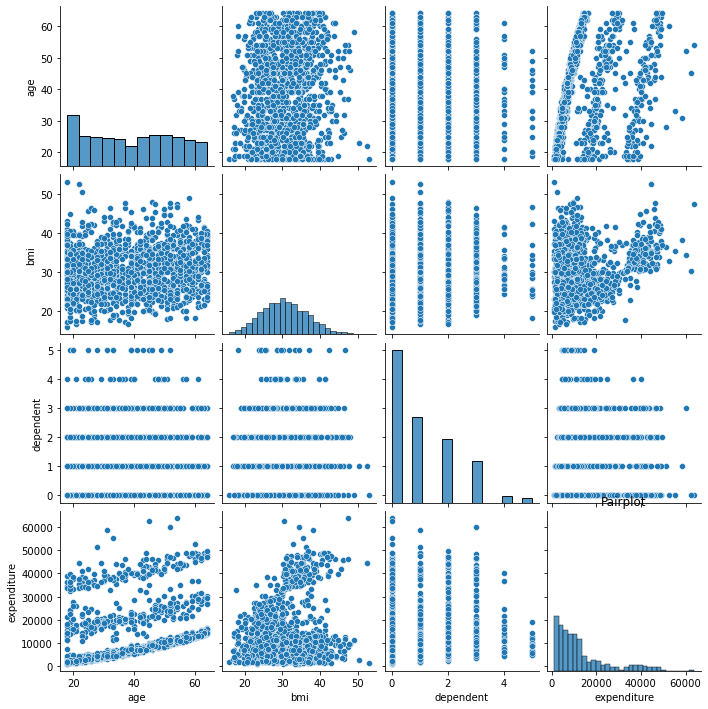

In [18]:
sns.pairplot(df_employee)
plt.title('Pairplot')
plt.show()

## 20. Display heatmap for the data 

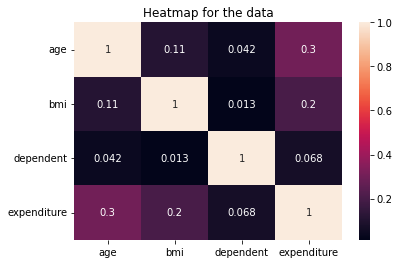

In [25]:
sns.heatmap(df_employee.corr(),annot=True)
plt.title('Heatmap for the data')
plt.show()